In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext
import DataPreprocessing

# Spark session

In [2]:
spark = SparkSession.builder.appName('DataPreprocessing').getOrCreate()
sc=spark.sparkContext

# Reading the data

In [3]:
file_name='Google-Playstore'

In [4]:
df = DataPreprocessing.read_data(spark)
# df.show(5)

# Get info about the data

In [5]:
# DataPreprocessing.get_info(df)

# Outliers

In [6]:
new_df= DataPreprocessing.detect_outliers(df)


Number of outliers in Rating: 0 (0.00%)
Number of outliers in Rating Count: 388994 (16.82%)
Number of outliers in Minimum Installs: 260554 (11.27%)
Number of outliers in Maximum Installs: 407678 (17.63%)
Number of outliers in Price: 44943 (1.94%)
Number of rows before removing outliers: 2312944
Number of rows after removing outliers: 1961130


### Display boxplot for numerical columns before and after removing the outliers

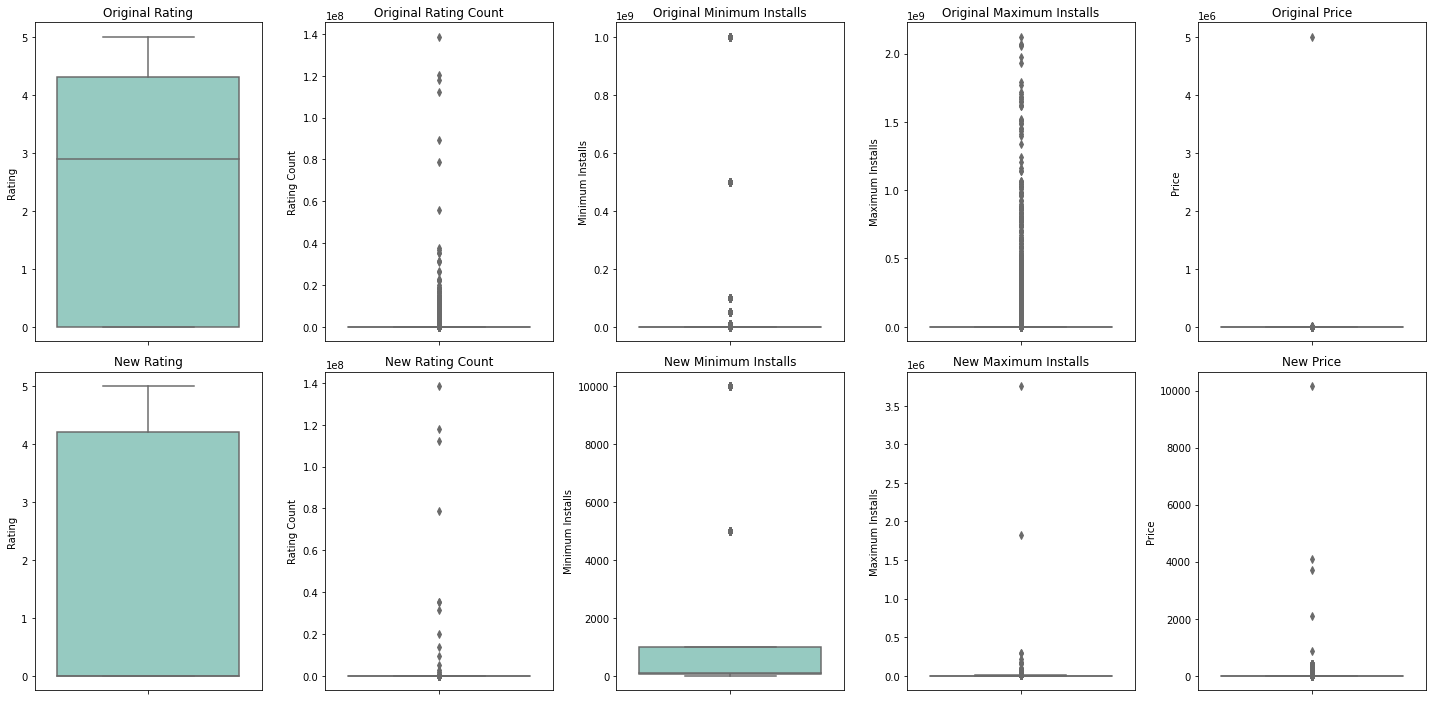

In [7]:

DataPreprocessing.boxplot_for_outliers(df, new_df)


### Safely remove the outliers

In [8]:
df= DataPreprocessing.remove_outliers(df,new_df) 


# Missing values

In [9]:
DataPreprocessing.show_nulls(df) 

                    count  percentage
Developer Website  760826   32.894268
Privacy Policy     420947   18.199619
Released            71055    3.072059
Rating              22913    0.990642
Rating Count        22894    0.989821
Minimum Android      6530    0.282324
Size                  196    0.008474
Minimum Installs      141    0.006096
Currency              135    0.005837
Installs              107    0.004626
Developer Email        38    0.001643
Maximum Installs       37    0.001600
Developer Id           33    0.001427
Price                  19    0.000821
Ad Supported            4    0.000173
In App Purchases        2    0.000086
Content Rating          0    0.000000
Editors Choice          0    0.000000
App Name                0    0.000000
Last Updated            0    0.000000
App Id                  0    0.000000
Free                    0    0.000000
Category                0    0.000000
Scraped Time            0    0.000000


## Handle missing values

### Remove columns with high percentages of nulls

In [10]:
df= DataPreprocessing.remove_useless_col(df,['Developer Website','Privacy Policy'])

### For Currency column

In [11]:
DataPreprocessing.currency_col(df)

+--------+-------+
|Currency|  count|
+--------+-------+
|     USD|2311518|
|     XXX|   1236|
|    null|    135|
|       0|     18|
|    True|     10|
|     EUR|      6|
|     INR|      5|
|     GBP|      3|
|     CAD|      2|
|     BRL|      1|
|     KRW|      1|
|     VND|      1|
|     RUB|      1|
|     TRY|      1|
|     ZAR|      1|
|     PKR|      1|
|     AUD|      1|
|    1.99|      1|
|     SGD|      1|
| 9126997|      1|
+--------+-------+



In [12]:
print("Since most of the values are USD, then we can remove this column,")
df = DataPreprocessing.remove_useless_col(df, ['Currency'])
print(df.columns)

Since most of the values are USD, then we can remove this column,
['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs', 'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Size', 'Minimum Android', 'Developer Id', 'Developer Email', 'Released', 'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Scraped Time']


### Removes rows with nulls in Uninteresting columns

In [21]:
uninteresting_cols= ['Minimum Android','Size','Minimum Installs','Installs','Developer Email',\
                   'Developer Id','Price','Ad Supported','In App Purchases']

df=DataPreprocessing.handle_missing_values(df,cols=uninteresting_cols)

Total Number of rows : 2312944
Number of rows after dropping: 2306010


### Fill rows with nulls in interesting columns

In [ ]:
interesting_cols=['Released','Rating','Rating Count','Maximum Installs']

### Prepare 'Size' column

In [14]:
# DataPreprocessing.handle_size_col(df)

In [15]:
# print('The percentage of "Varies with app" is too low, then can remove all rows with this value')
# df = df.filter(df.Size != 'Varies with device')

### Write df to csv

In [16]:
# pd_df = df.toPandas()
# pd_df.to_csv('../Dataset/'+file_name+'.csv', index=False)

### Splitting the data 

In [17]:
# DataPreprocessing.split_data()

### Prepare dataset for RDD

In [18]:
# DataPreprocessing.delimiter_to_comma()
# DataPreprocessing.delimiter_to_comma(file_name='train')
# DataPreprocessing.delimiter_to_comma(file_name='val')
# DataPreprocessing.delimiter_to_comma(file_name='test')